Para garantir a correta sequência dos resultados esperados em cada seção, criou-se o método `get_arguments` para obter argumentos ao executar o script `main.py` da Parte1 deste trabalho. Desta maneira, é possível executar partes do script, mostrando somente o que se deseja.

# 1 Sistemas de Recomendação

Dados de preferência de usuários são usados para recomendação de filmes nesta parte do trabalho. Esses dados são avaliações de usuários em uma escala de 1 a 5. As próximas seções detalham a implementação de um algoritmo de recomendação específico conhecido como Filtragem Colaborativa.

## 1.1 Conjunto de dados de classificações de filme

Os dados podem ser identificados pela matriz $Y$ que armazena as classificações e pela matriz $R$, matriz de valor binario ($0$ ou $1$), que indica se o usuário forneceu uma classificação para o filme ou não. Outras matrizes utilizadas nesta parte do trabalho são $X$ e $\Theta$, a primeira corresponde ao vetor de características de cada filme, e a outra corresponde ao vetor de parâmetros para cada usuário. 

Pode-se visualizar os dados de forma a renderizar a matriz de classificações dos filmes como se fosse uma imagem. Esse gráfico pode ser visto a seguir.

Avaliação média para filme 1 (Toy Story): 3.878319 / 5




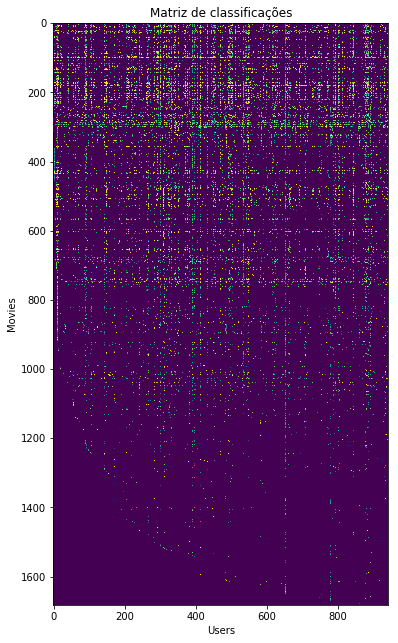

In [1]:
%matplotlib inline
%run Parte1/main.py --explore-data True

## 1.2 Algoritmo de aprendizagem de filtragem colaborativa

### 1.2.1 Função de custo da filtragem colaborativa

Nesta etapa o objetivo é calcular a função de custo $J$ para a filtragem colaborativa sem regularização. O custo somente deve ser obtido para o filme $i$ classificado pelo usuário $j$, ou seja, $R(i, j) = 1$.

In [2]:
%run Parte1/main.py --cost-func True

Custo computado usando parâmetros pré-treinados: 22.224604 
(valor deve ser próximo de 22.22)


### 1.2.2 Gradiente de filtragem colaborativa

Assim como no cálculo da função de custo, o cálculo do gradiente nessa seção também é sem regularização. Complementa-se o script `cofiCostFunc.py` para obter o gradiente do vetor de parâmetros $\theta$ e do vetor de características $x$, e retorná-los em um unico vetor.

In [3]:
%run Parte1/main.py --gradient True

Gradiente 
 [ -2.52899165  -0.56819597  -0.83240713  -0.38358278  -0.80378006
   7.57570308   3.35265031   4.91163297   2.26333698   4.74271842
  -1.89979026  -0.52339845  -0.76677878  -0.35334048  -0.74040871
 -10.5680202   -3.05099006   0.           0.           4.62776019
   1.16441367   0.           0.          -7.16004443  -3.47410789
   0.           0.        ]


## 1.3 Aprendizado de Recomendações para Filmes

Esta etapa destina-se ao treinamento do modelo para criar recomendações baseadas nas avaliações de filmes de um novo usuário. Para que a função de otimização da biblioteca `sklearn` consiga terminar com sucesso, aplicou-se o fator de regularização $\lambda = 10$, caso contrário a operação dá um aviso (`Warning: Maximum number of iterations has been exceeded`) e fornece avaliações fora da escala de 1 a 5.

In [4]:
%run Parte1/main.py

Avaliações do novo usuário:
	Avaliou 4 para Toy Story (1995)
	Avaliou 3 para Twelve Monkeys (1995)
	Avaliou 5 para Usual Suspects, The (1995)
	Avaliou 4 para Outbreak (1995)
	Avaliou 5 para Shawshank Redemption, The (1994)
	Avaliou 3 para While You Were Sleeping (1995)
	Avaliou 5 para Forrest Gump (1994)
	Avaliou 2 para Silence of the Lambs, The (1991)
	Avaliou 4 para Alien (1979)
	Avaliou 5 para Die Hard 2 (1990)
	Avaliou 5 para Sphere (1998)

Treinamento da filtragem colaborativa...
Optimization terminated successfully.
         Current function value: 35118.790099
         Iterations: 338
         Function evaluations: 501
         Gradient evaluations: 501
Aprendizado do Sistema de Recomendação finalizado.

Recomendações principais:
	Previsão de avaliação 5.0 para Great Day in Harlem, A (1994)
	Previsão de avaliação 4.8 para Wrong Trousers, The (1993)
	Previsão de avaliação 4.8 para Close Shave, A (1995)
	Previsão de avaliação 4.5 para Shawshank Redemption, The (1994)
	Previsão de 

# 2 Aprendizado de Comitês

Comitês (*ensembles*) são abordagens para combinar várias técnicas de aprendizagem supervisionado em um modelo preditivo. O objetivo dessa técnica é produzir uma classificação melhor do que os classificadores separados conseguiriam. As próximas seções trazem a implementação dos métodos de criação de *ensembles*: **Bagging** e **Boosting**.

## 2.1 Algoritmo AdaBoost

Boosting é uma abordagem destinada a modelos que sofrem de viés (*bias*) alto = *underfitting*. AdaBoost é um algoritmo que implementa o método de Boosting, onde existem pesos para ponderação sobre os exemplos e pesos para importância do classificador. Durante as iterações, os exemplos que o algoritmo não teve bom desempenho, recebem pesos maiores. A seguir, os detalhes da implementação desse algoritmo são apresentados.

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

O *dataset* importado `make_hastie_10_2` gera dados para classificação binária usada em Hastie et al. 2009, exemplo 10.2. A leitura dos dados desse *dataset* e a separação deles em conjunto de treinamento e teste seguem abaixo.

In [6]:
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y

In [7]:
train, test = train_test_split(df, test_size = 0.2)
X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]

O princípio do AdaBoost é ajustar uma sequência de *weak learners* (modelos que são apenas ligeiramente melhores do que adivinhações aleatórias) em versões repetidamente modificadas dos dados. Diferentes *learners* podem ser especificados através do parâmetro `base_estimator`. Nesse caso, a implementação usa Árvore de Decisão (*Decision Tree*).

In [8]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

tree = clf_tree.fit(X_train, Y_train)
Y_train_pred = tree.predict(X_train)
Y_test_pred = tree.predict(X_test)

er_tree_train_ini = 1 - accuracy_score(Y_train, Y_train_pred)
er_tree_test_ini = 1 - accuracy_score(Y_test, Y_test_pred)

print('Taxa de erro de treinamento sem ensemble = {0:.3f}'.format(er_tree_train_ini))
print('Taxa de erro de teste sem ensemble = {0:.3f}'.format(er_tree_test_ini))

Taxa de erro de treinamento sem ensemble = 0.458
Taxa de erro de teste sem ensemble = 0.465


Para ajuste e predição do classificador AdaBoost são criados $40$ comitês diferentes, que possuem de $10$ até $400$ *learners*. Além disso, são armazenadas as taxas de erro durante o treinamento e teste do modelo para cada comitê.

In [9]:
er_train_sklearn, er_test_sklearn = [er_tree_train_ini], [er_tree_test_ini]

x_range = range(10, 410, 10)
for i in x_range:
    ada = AdaBoostClassifier(base_estimator=clf_tree, n_estimators=i)
    ada = ada.fit(X_train, Y_train)
    Y_train_pred = ada.predict(X_train)
    Y_test_pred = ada.predict(X_test)

    er_tree_train = 1 - accuracy_score(Y_train, Y_train_pred) 
    er_tree_test = 1 - accuracy_score(Y_test, Y_test_pred)
    
    er_train_sklearn.append(er_tree_train)
    er_test_sklearn.append(er_tree_test)
    
print('Taxa de erro de treinamento com Boosting = {0:.3f}'.format(er_train_sklearn[-1]))
print('Taxa de erro de teste com Boosting = {0:.3f}'.format(er_test_sklearn[-1]))

Taxa de erro de treinamento com Boosting = 0.004
Taxa de erro de teste com Boosting = 0.032


### 2.1.1 Implementação do AdaBoost sem `sklearn`

O script que é executado abaixo foi adaptado do [repositório jaimeps](https://github.com/jaimeps/adaboost-implementation/blob/master/adaboost.py), uma implementação do algoritmo AdaBoost sem o uso da biblioteca `sklearn`.

In [10]:
%run Parte2/adaboost.py

In [11]:
print('Taxa de erro final de treinamento = {0:.3f}'.format(er_train[-1]))
print('Taxa de erro final de teste = {0:.3f}'.format(er_test[-1]))

Taxa de erro final de treinamento = 0.071
Taxa de erro final de teste = 0.087


### 2.1.2 Comparação das implementações

É possível comparar os resultados obtidos através do gráfico que plota as taxas de erro de treinamento e de teste pela quantidade de iterações, de cada uma das implementações apresentadas acima.

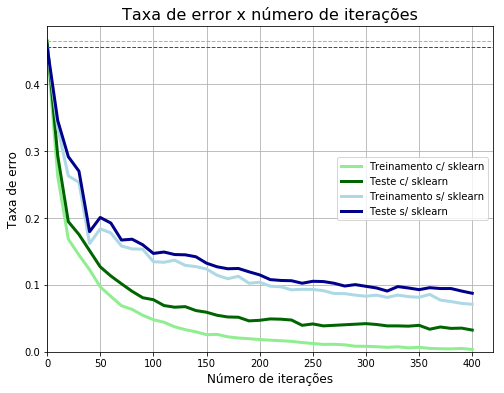

In [12]:
df_error = pd.DataFrame([er_train_sklearn, er_test_sklearn, er_train, er_test]).T
df_error.columns = ['Treinamento c/ sklearn', 'Teste c/ sklearn', 'Treinamento s/ sklearn', 'Teste s/ sklearn']
plot1 = df_error.plot(linewidth = 3, figsize = (8,6), color = ['lightgreen','darkgreen','lightblue', 'darkblue'], grid = True)
plot1.set_xlabel('Número de iterações', fontsize = 12)
plot1.set_xticklabels(range(0,450,50))
plot1.set_ylabel('Taxa de erro', fontsize = 12)
plot1.set_title('Taxa de error x número de iterações', fontsize = 16)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2))
plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')
plt.axhline(y=er_test_sklearn[0], linewidth=1, color = 'orange', ls = 'dashed')

Observa-se que ao final das iterações a implementação com a biblioteca `sklearn` é a melhor, possivelmente dado aos recursos de otimização implementados pela biblioteca.

## 2.2 Algoritmo Bagging


Diferentemente do Boosting, oo Bagging é adequado para modelos que apresentam variância alta = *overfitting*. As saídas dos classificadores são combinadas por meio do voto majoritário com base em suas decisões, e cada subconjunto dos dados (*bootstrap sample*) é usado para treinar um classificador do mesmo tipo.

O *dataset* `make_hastie_10_2` também é utilizado nesta seção para a implementação do algoritmo Bagging. E assim como no Boosting, a construção do comitê é feita com árvores de decisão (parâmetro `base_estimator`), definida anteriormente como `clf_tree`.

In [13]:
from sklearn.ensemble import BaggingClassifier


er_train_sklearn, er_test_sklearn = [er_tree_train_ini], [er_tree_test_ini]

x_range = range(10, 410, 10)
for i in x_range:
    bag = BaggingClassifier(base_estimator=clf_tree, n_estimators=i)
    bag = bag.fit(X_train, Y_train)
    Y_train_pred = bag.predict(X_train)
    Y_test_pred = bag.predict(X_test)

    er_tree_train = 1 - accuracy_score(Y_train, Y_train_pred) 
    er_tree_test = 1 - accuracy_score(Y_test, Y_test_pred)
    
    er_train_sklearn.append(er_tree_train)
    er_test_sklearn.append(er_tree_test)
    
print('Taxa de erro final de treinamento = {0:.3f}'.format(er_train_sklearn[-1]))
print('Taxa de erro final de teste = {0:.3f}'.format(er_test_sklearn[-1]))

Taxa de erro final de treinamento = 0.306
Taxa de erro final de teste = 0.318


A avaliação do resultado é feita através da analise do gráfico abaixo, que plota a taxa de erro contra a quantidade de iterações.

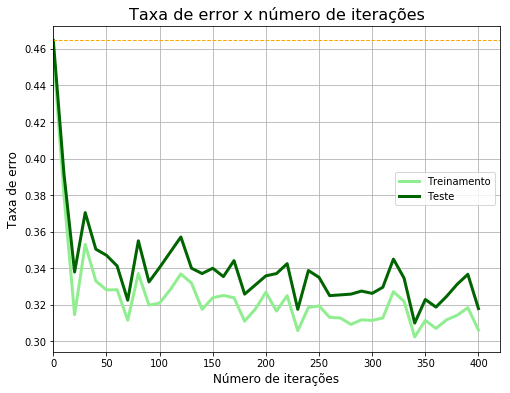

In [14]:
df_error = pd.DataFrame([er_train_sklearn, er_test_sklearn]).T
df_error.columns = ['Treinamento', 'Teste']
plot1 = df_error.plot(linewidth = 3, figsize = (8,6), color = ['lightgreen','darkgreen'], grid = True)
plot1.set_xlabel('Número de iterações', fontsize = 12)
plot1.set_xticklabels(range(0,450,50))
plot1.set_ylabel('Taxa de erro', fontsize = 12)
plot1.set_title('Taxa de error x número de iterações', fontsize = 16)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,y1,y2))
plt.axhline(y=er_test_sklearn[0], linewidth=1, color = 'orange', ls = 'dashed')

## 2.3 AdaBoost x Bagging

Comparando as duas implementações de comitês, é possível concluir que o método AdaBoost mostrou-se mais ideal, visto que a taxa de erro do Bagging não convergiu com o aumento das iterações. Isso indica que o modelo sofre de viés alto, sendo necessário aumentar a sua complexidade para ajuste dos dados de treinamento. 